## 线性模型和部分依赖图
2022-07-15
- PDP图加上特征分布图
2022-08-11
- 在新的特征集上绘制PDP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

import sys
sys.path.append(r'C:\Users\Administrator\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
sys.path.append(r'C:\Users\18316\Desktop\Repositories\Low-Frequency-Spread-Estimator\notebook\tools')
from train_tools import *
from get_signal import *
from naive_model import *
import pickle

sys.path.append('C:/Users/Administrator/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/18316/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Handsome Bad Guy/Desktop/Repositories/Low-Frequency-Spread-Estimator')

from SpreadEstimator.SpreadEstimator import SpreadEstimator
from mytools.AutoTester import AutoTester

import lightgbm as lgbm

In [2]:
Linear_spread_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/Linear_spread_cs.pt')
Linear_rela_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/Linear_rela_cs.pt')

### 查看标准差标准化后的系数

In [72]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
spread_std = np.zeros(10)
for i in range(len(x)):
    spread_std += np.std(x[i].cpu().numpy(),axis=0)
spread_std /= len(x)

with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ)
rela_std = np.zeros(10)
for i in range(len(x)):
    rela_std += np.std(x[i].cpu().numpy(),axis=0)
rela_std /= len(x)


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 888.08it/s]


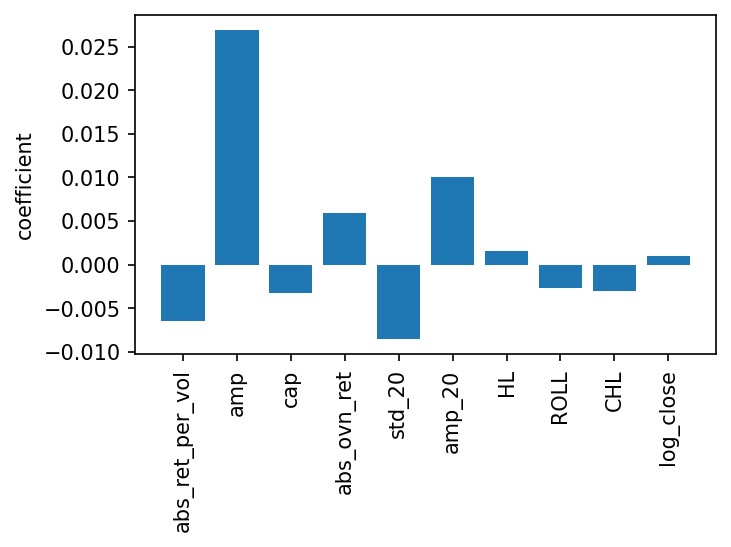

In [73]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']  # 特征名字
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_spread_cs.weight.detach().cpu().numpy()[0]*spread_std)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

plt.show()

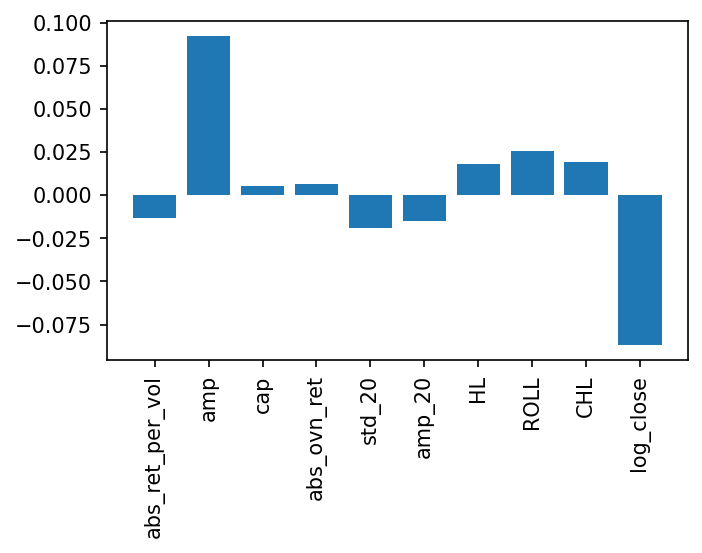

In [74]:
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, Linear_rela_cs.weight.detach().cpu().numpy()[0]*rela_std*100)
plt.xticks(rotation=90)
plt.show()

In [9]:
Linear_spread_cs.weight.detach().cpu().numpy()[0]

array([-0.13875654,  0.02161704, -0.00329324,  0.01702883, -0.00924768,
        0.00143344,  0.00058518, -0.00314383, -0.00058875,  0.00120247],
      dtype=float32)

### lgbm特征重要性

In [2]:
with open(r'D:\Documents\学习资料\本科毕业论文/model/lgbm_rela_cs.pkl', 'rb') as f:
    lgbm_rela = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/model/lgbm_spread_cs.pkl', 'rb') as f:
    lgbm_spread = pickle.load(f)    

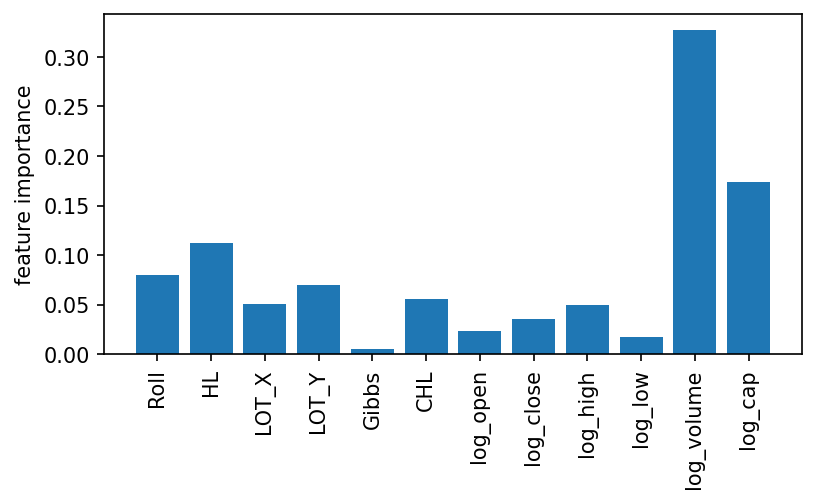

In [3]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, lgbm_spread.feature_importance()/np.sum(lgbm_spread.feature_importance()))
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


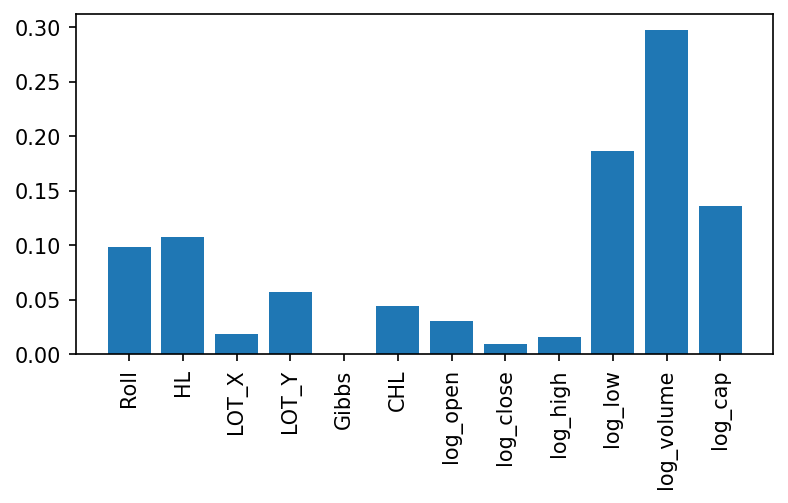

In [4]:
plt.figure(figsize=(6,3),dpi=150)
plt.bar(fea_names, lgbm_rela.feature_importance()/np.sum(lgbm_rela.feature_importance()))
plt.xticks(rotation=90)
# plt.ylabel('feature importance')
plt.show()

### XGBoost特征重要性

In [3]:
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_rela.pkl', 'rb') as f:
    xgb_rela = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/model/xgb_spread.pkl', 'rb') as f:
    xgb_spread = pickle.load(f)    

C:\Users\18316\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


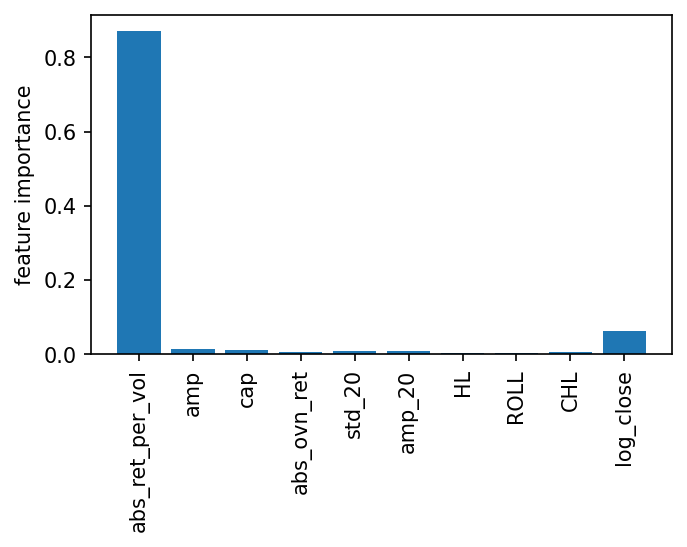

In [4]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_spread.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


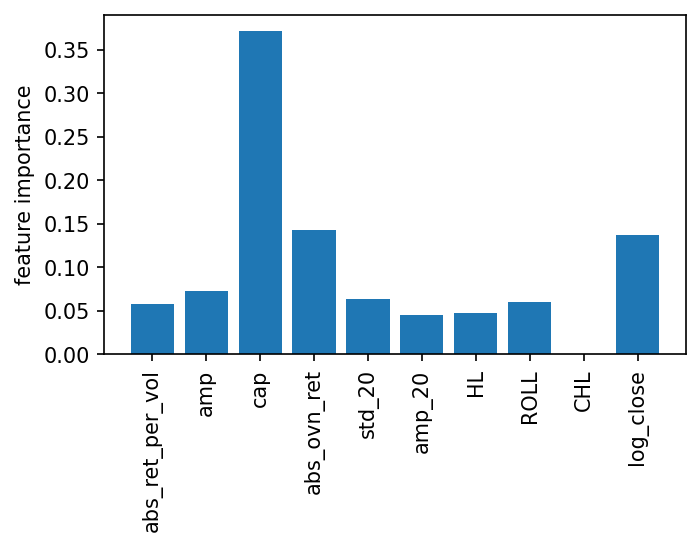

In [9]:
fea_names = [ 'abs_ret_per_vol', 'amp', 'cap', 'abs_ovn_ret', 'std_20', 'amp_20', 'HL', 'ROLL', 'CHL', 'log_close']
plt.figure(figsize=(5,3),dpi=150)
plt.bar(fea_names, xgb_rela.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('feature importance')
plt.show()


### 神经网络的部分依赖图

In [6]:
GateNet_rela_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_rela_cs.pt')
GateNet_spread_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_spread_cs.pt')

In [15]:
GateNet_rela_cs(x_new)

tensor([[ 0.0918],
        [-0.0034],
        [ 0.5859],
        ...,
        [ 0.3367],
        [ 0.6256],
        [-0.2009]], device='cuda:0', grad_fn=<AddmmBackward0>)

#### spread的部份依赖图

In [7]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ & close_top, 20, 160)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.nanmean(x_[:, i])
        x_[torch.isnan(x_[:,i]), i] = 0
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        x_new[torch.isnan(x_new)] = 0
        y_rp.append(torch.mean(GateNet_spread_cs(x_new)).item())
    x_m.append(x_rp)
    y_m.append(y_rp)

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (216470x12 and 6x6)

In [22]:
x_

tensor([[-0.3691, -0.4821,  1.1646,  ..., -0.2684,  1.5462,  3.3701],
        [-0.3642, -0.3408,  0.7434,  ...,  0.2167,  1.2618,  3.5011],
        [ 0.1089, -0.2621,  0.2507,  ...,  0.2028, -0.6913, -0.5335],
        ...,
        [ 0.8380,  1.4354,  0.8804,  ...,  0.7351,  0.7036,  0.7601],
        [-0.2746,  0.2792,  0.0770,  ..., -0.3063, -0.3447, -0.9843],
        [ 4.3962,  2.9595, -0.5920,  ...,  6.5283,  0.4046,  3.8565]],
       device='cuda:0')

In [23]:
GateNet_spread_cs(x[10000:100010])

tensor([[1.4086],
        [1.2426],
        [1.9494],
        ...,
        [1.2039],
        [4.9693],
        [1.2704]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [25]:
y[10000:100010]*100

tensor([[1.2513],
        [1.5887],
        [2.2701],
        ...,
        [1.2642],
        [4.9143],
        [1.1194]], device='cuda:0')

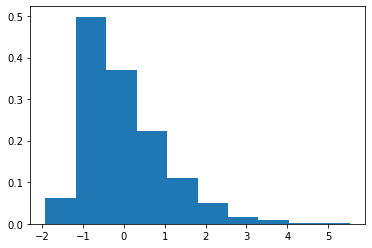

In [42]:
plt.hist(x[:,i].cpu().numpy(),density=True)
plt.show()

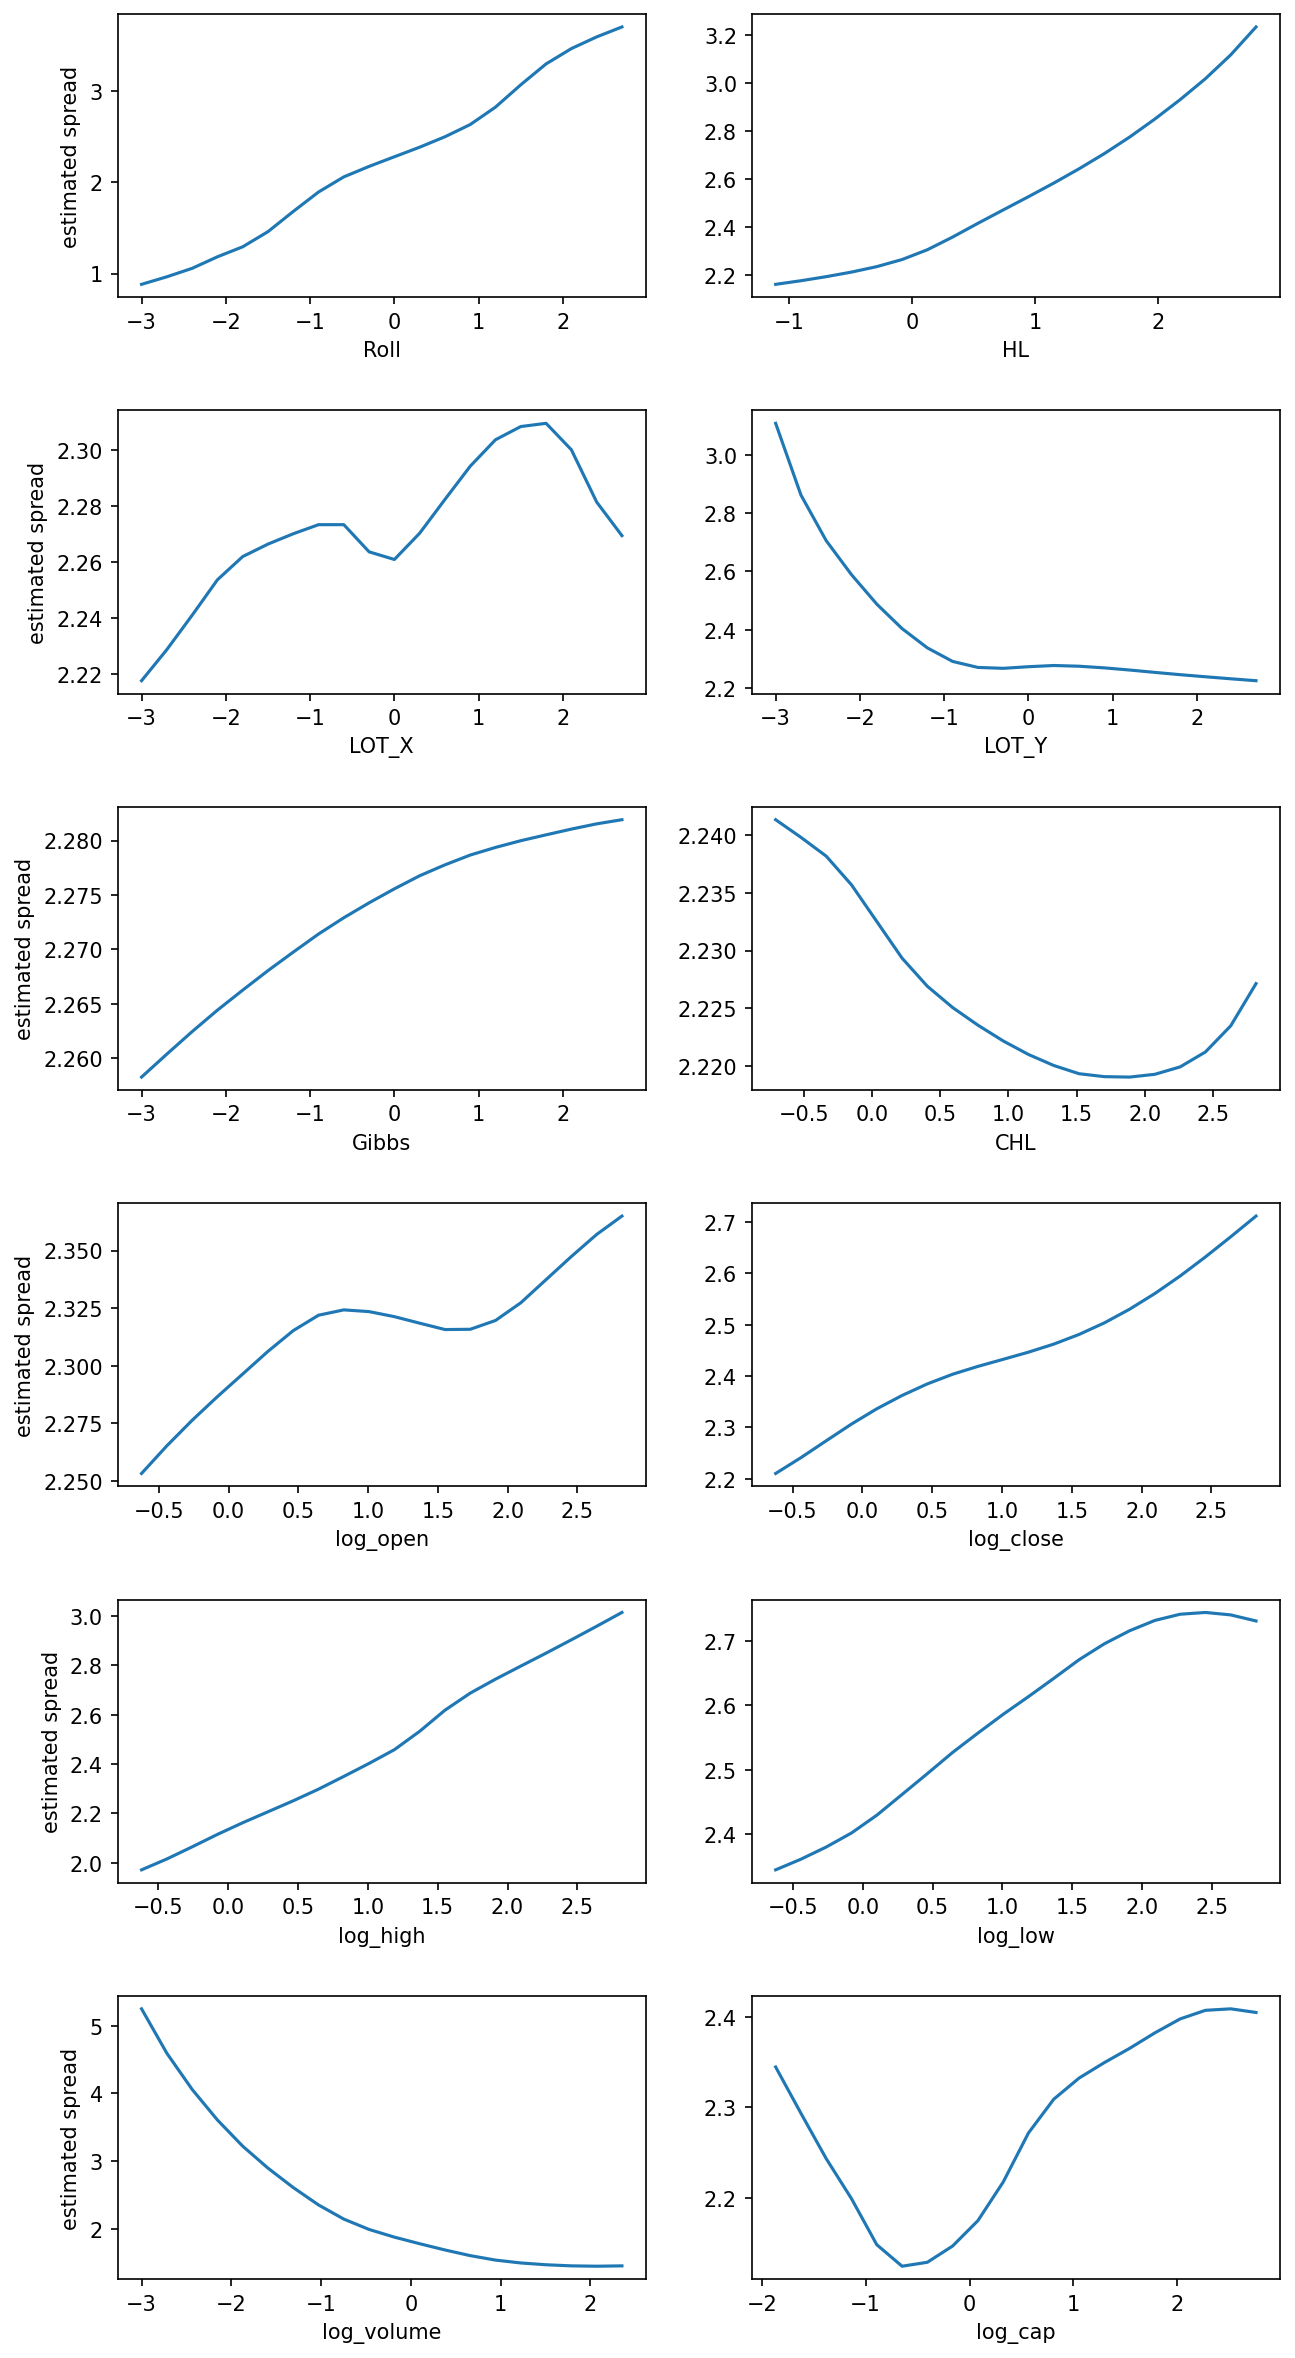

In [27]:
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])

plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i]))
#     plt.hist(x[:,i].cpu().numpy(),density=True)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela_spread部份依赖图

In [37]:
se = SpreadEstimator()
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
univ = univ & close_top
x, y = get_train_data_cs(signal, target, univ & close_top, 20, 160)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
y_m_Linear = []  #　存放Linear的预测
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    y_rp_Linear = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        x_new[torch.isnan(x_new)] = 0
        y_rp.append(torch.mean(GateNet_rela_cs(x_new)).item()*100)
        y_rp_Linear.append(torch.mean(Linear_rela_cs(x_new)).item()*100)
    x_m.append(x_rp)
    y_m.append(y_rp)
    y_m_Linear.append(y_rp_Linear)

100%|████████████████████████████████████████| 12/12 [00:00<00:00, 22.01it/s]


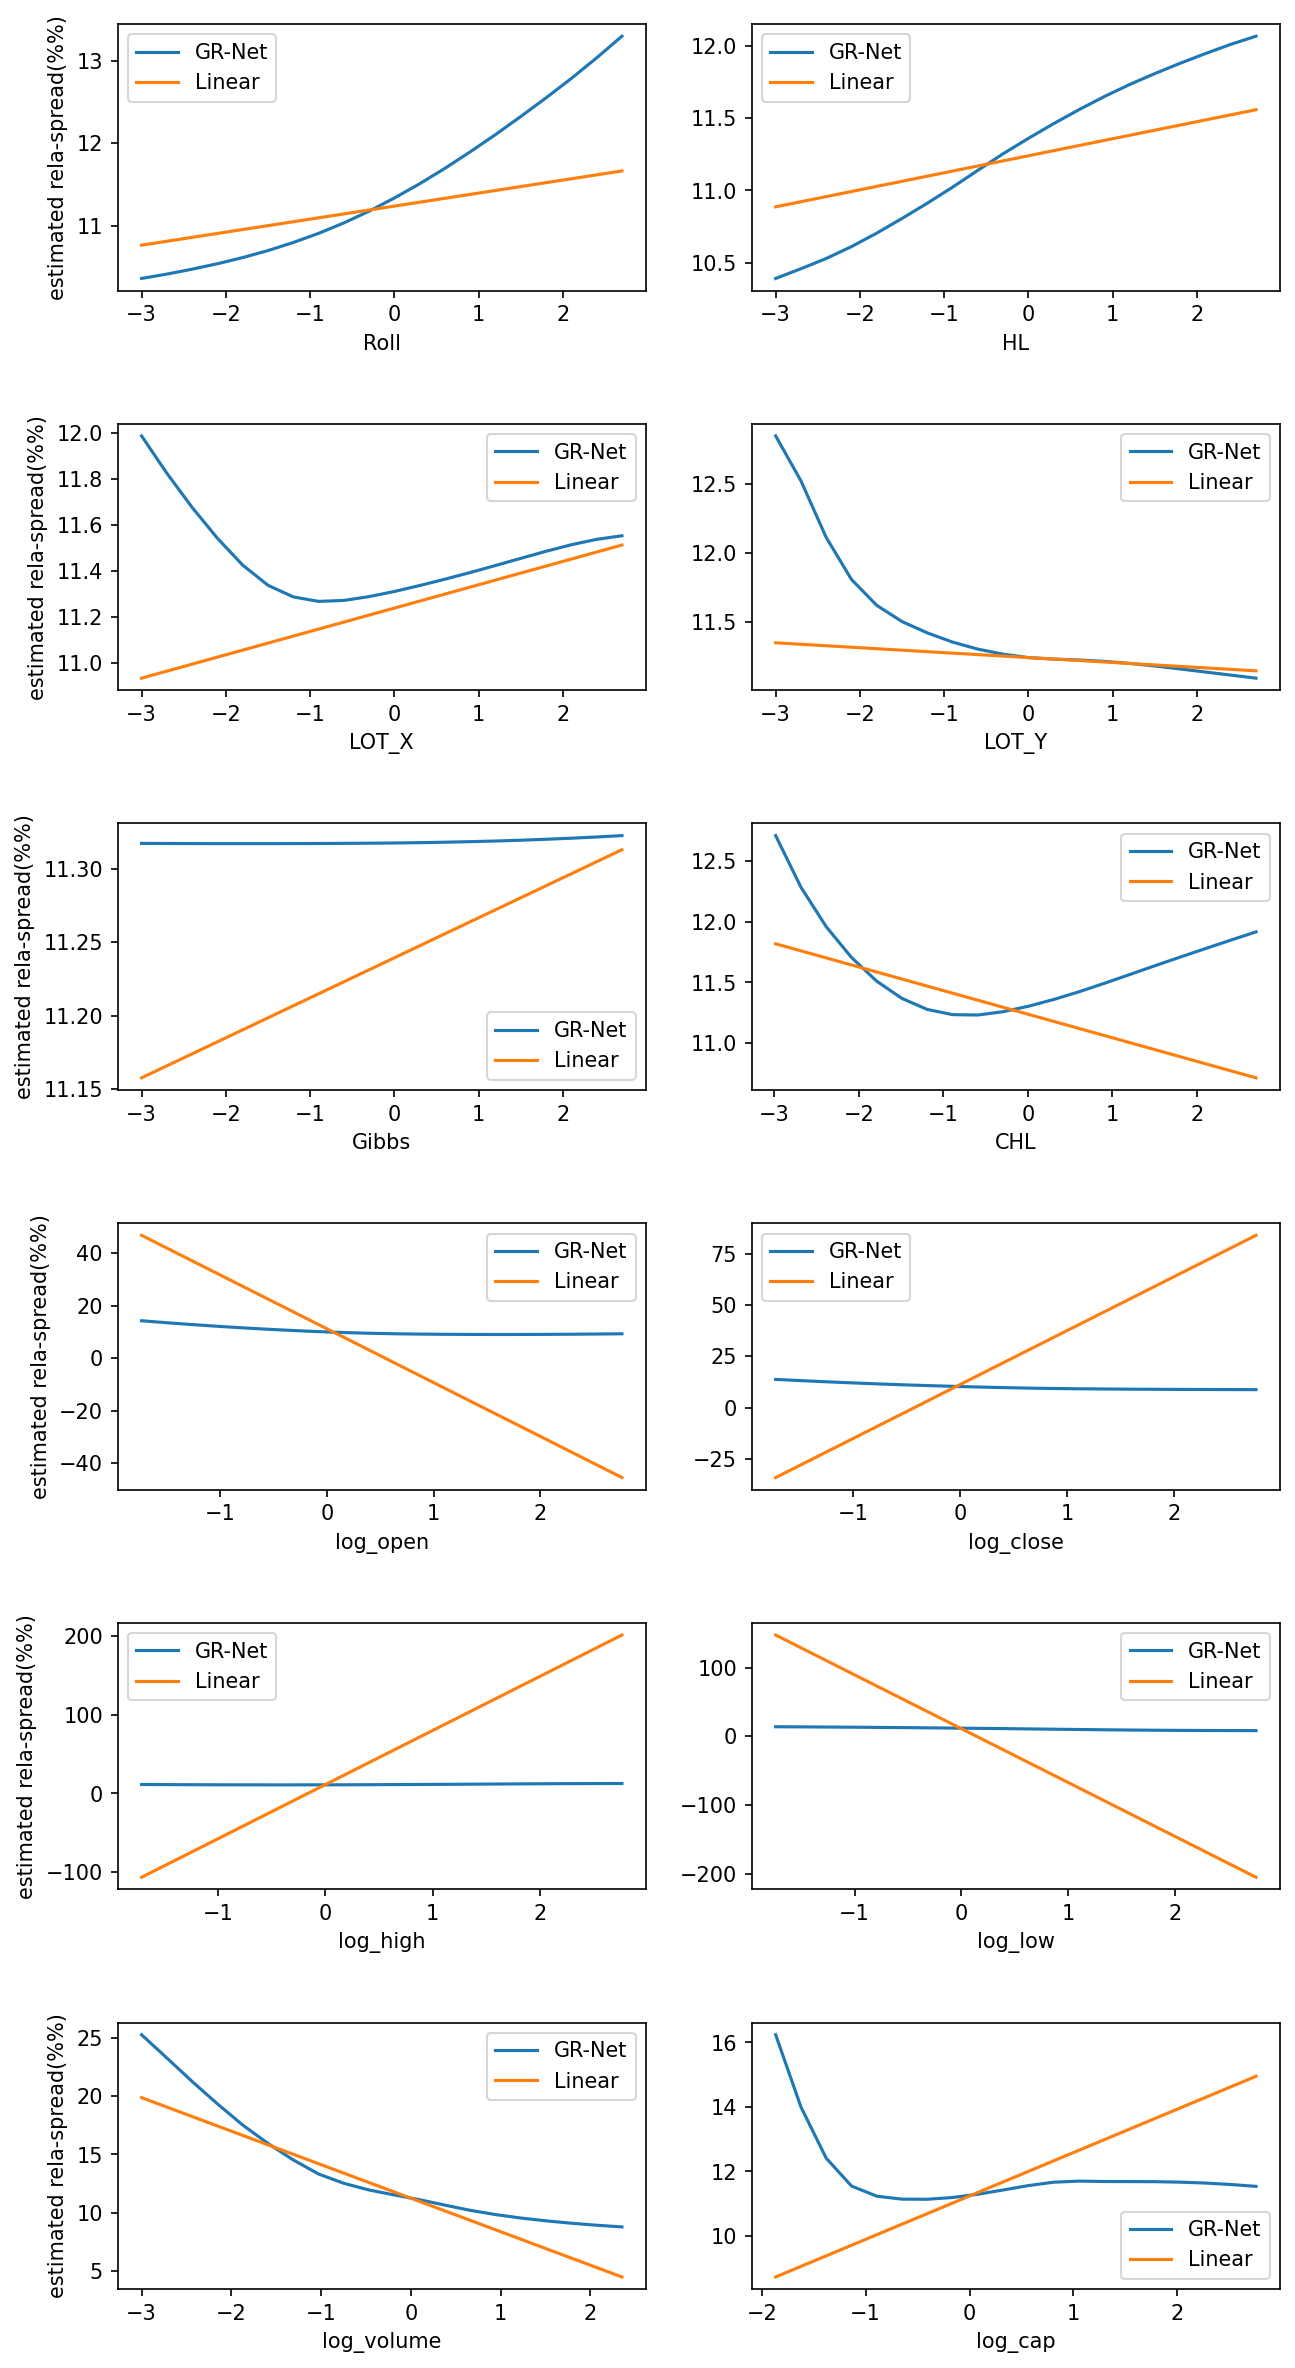

In [39]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.5)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i])/100, label='GR-Net')
    plt.plot(x_m[i], np.array(y_m_Linear[i])/100, label='Linear')
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread(%%)')
    plt.legend()
plt.show()

### 树模型的部分依赖图

#### spread

In [5]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 160)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_spread.predict(x_new.cpu().detach().numpy())))
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:48<00:00,  4.07s/it]


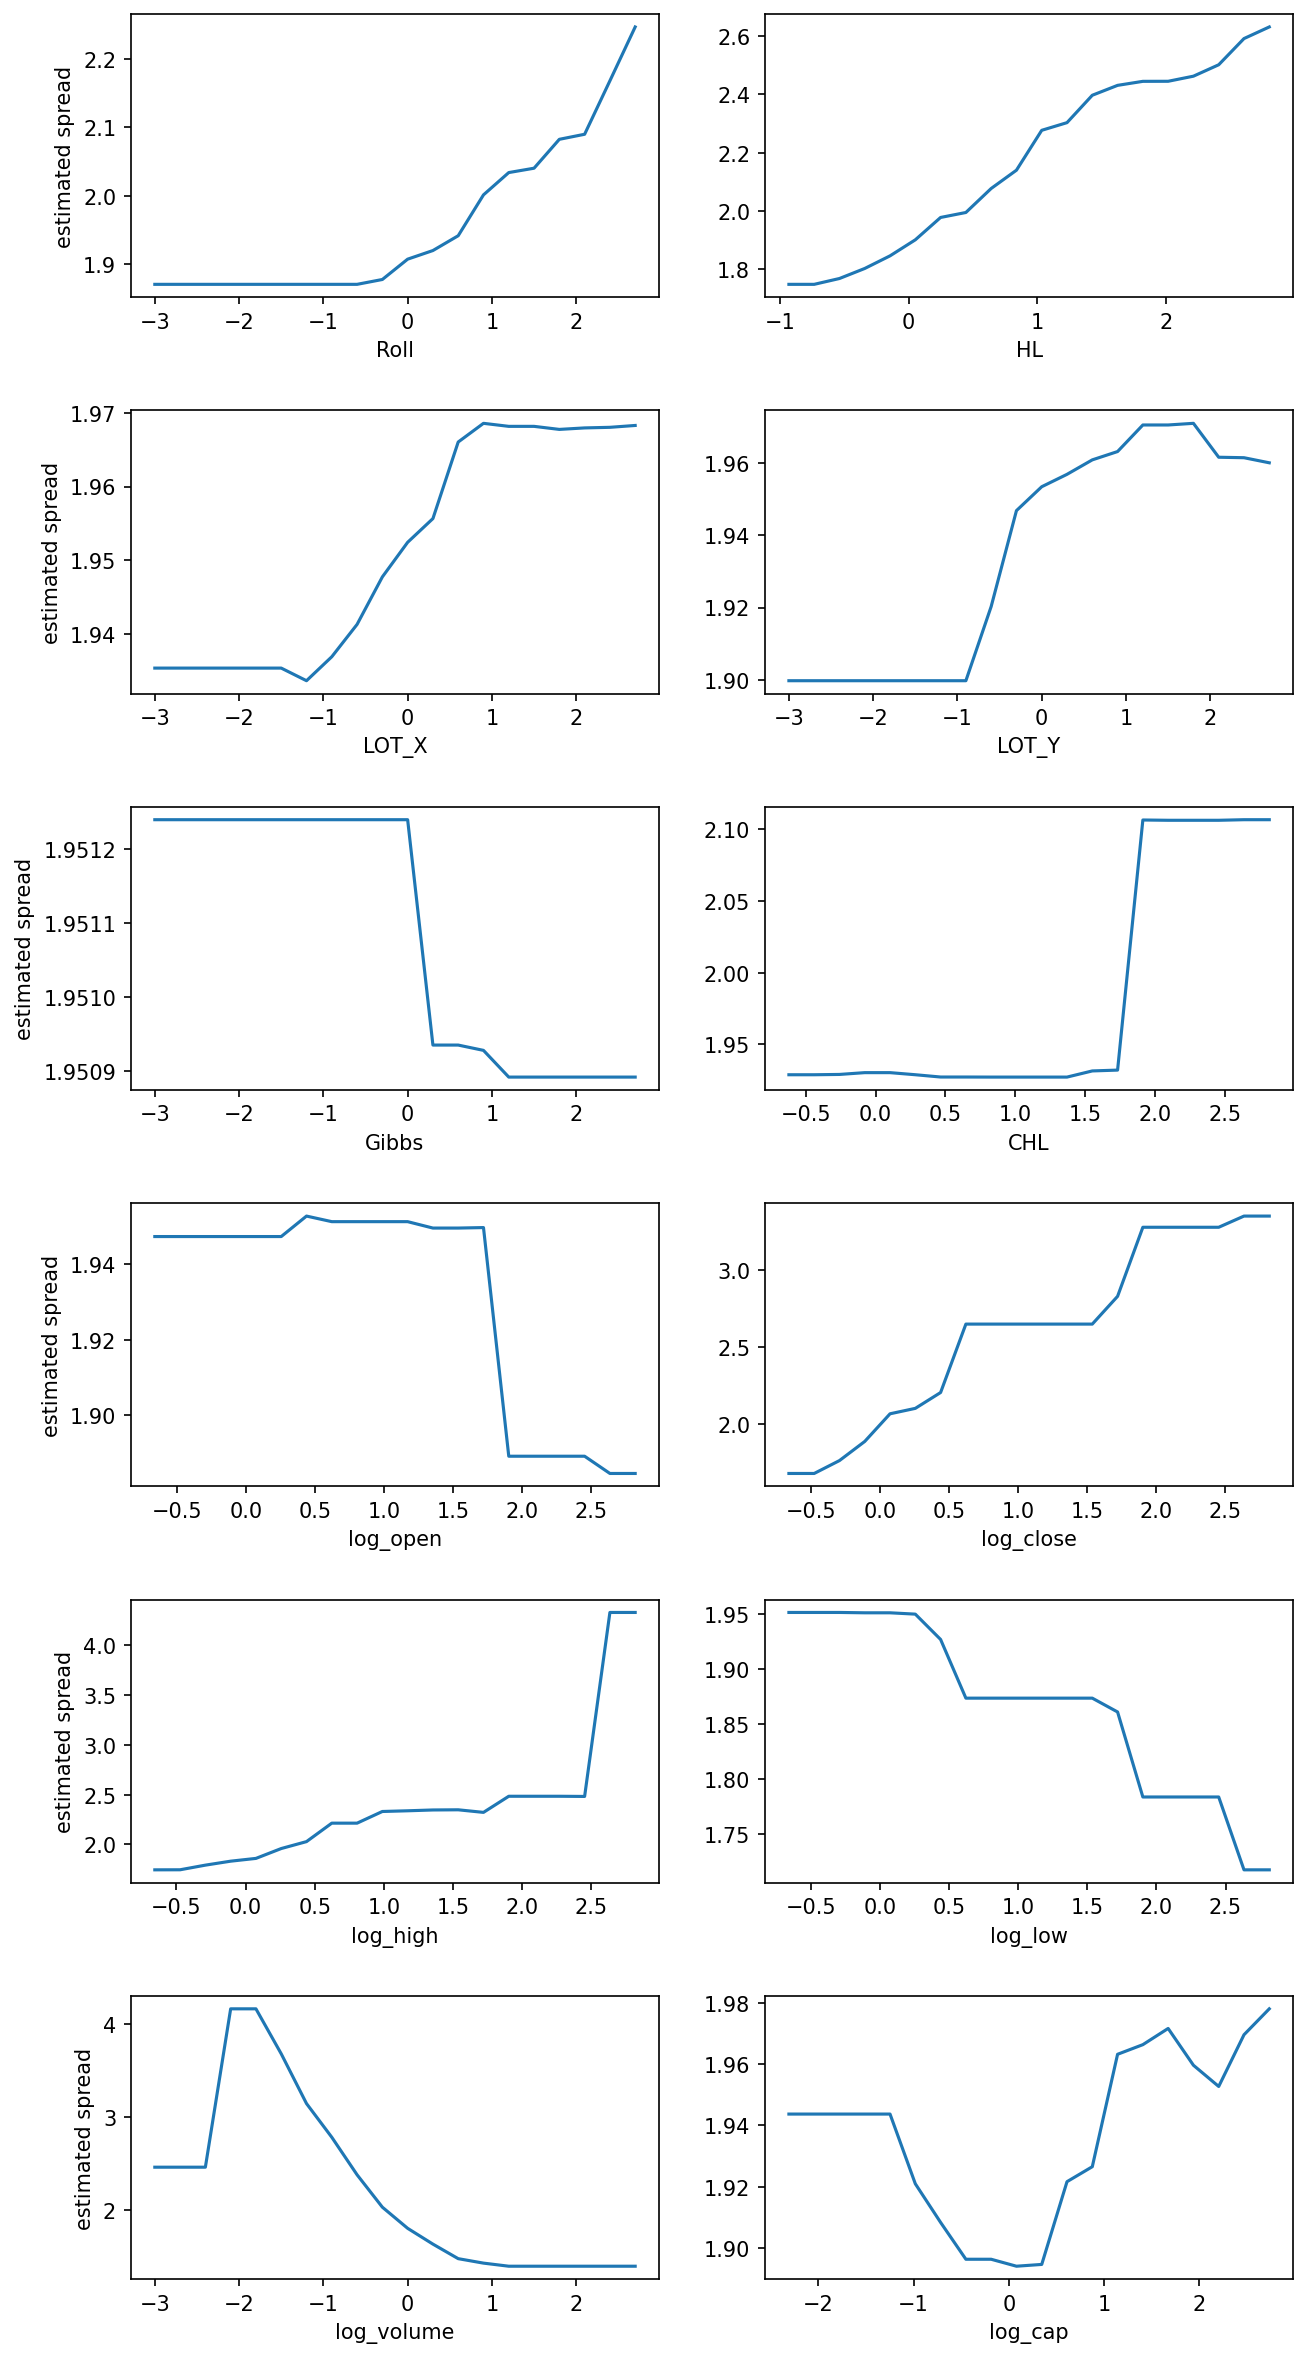

In [8]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i])*100)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated spread')
plt.show()

#### rela

In [9]:
se = SpreadEstimator()
univ = ~np.isnan(se.data.data_dic['close'])  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
x, y = get_train_data_cs(signal, target, univ, 20, 160)
xx = []
for x_ in x:
    for i in range(x_.shape[1]):
        x_[:, i] -= torch.mean(x_[:, i])
        x_[:, i] /= torch.std(x_[:, i])
    xx.append(x_)
x = xx
x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)

x_m = []
y_m = []
for i in tqdm(range(12)):
    lb = np.nanmax([torch.min(x[:, i]).item(),-3])
    ub = np.nanmin([torch.max(x[:, i]).item(),3])
    x_rp = np.arange(lb,ub,(ub-lb)/20)
    y_rp = []
    for xx in x_rp:
        x_new = torch.clone(x)
        x_new[:,i] = xx
        y_rp.append(np.mean(lgbm_rela.predict(x_new.cpu().detach().numpy()))*100)
    x_m.append(x_rp)
    y_m.append(y_rp)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:51<00:00,  4.33s/it]


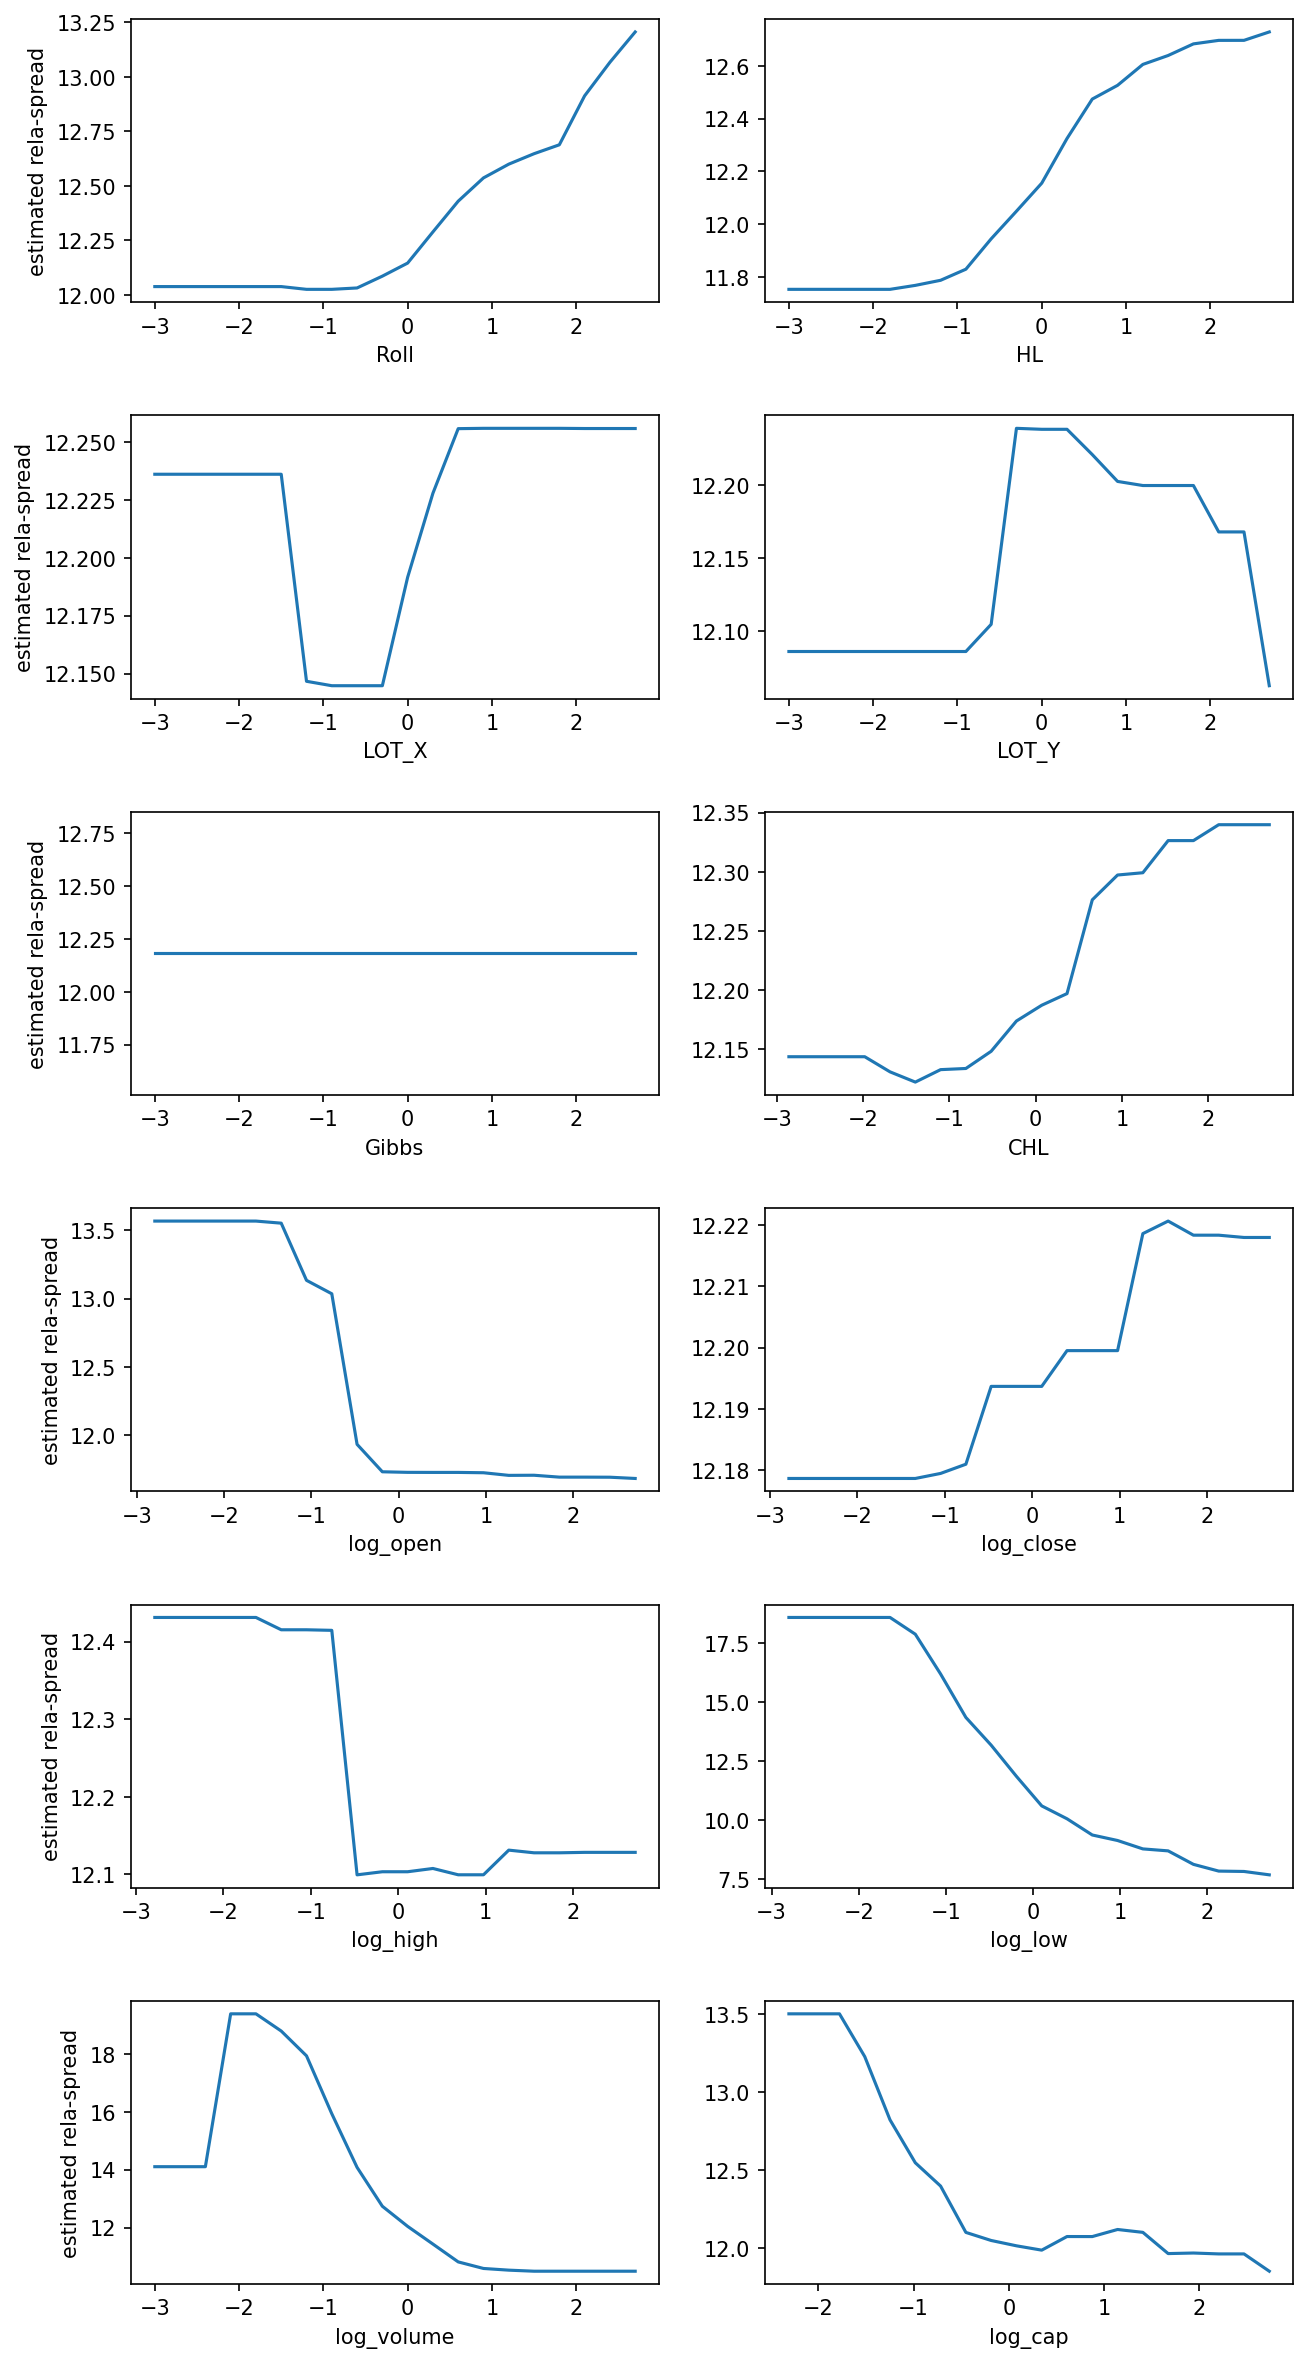

In [11]:
plt.figure(figsize=(10,20), dpi=150)
plt.subplots_adjust(hspace=0.4)
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(x_m[i], np.array(y_m[i])*100)
    plt.xlabel(fea_names[i])
    if i%2 == 0:
        plt.ylabel('estimated rela-spread')
plt.show()

### Shapley Value
1. 字典：每个样本每个特征的特征值，shapley value值，以及对应的该样本的超额输出
2. 计算每个特征的shapley value值的绝对值的均值；
3. 计算每个特征的特征值和shapley value值的关系；

In [26]:
GateNet_rela_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_rela_cs.pt')
GateNet_spread_cs = torch.load(r'D:\Documents\学习资料\本科毕业论文\model/GateNet_spread_cs.pt')

In [4]:
def sv(model, x, M: int = 1000000):
    res = {i: [] for i in range(x.shape[1])} 
    for i in tqdm(range(len(x))):  # 循环每个样本
        for j in range(x.shape[1]):  # 循环每个特征
            se = torch.rand(M, x.shape[1]).cuda()
            se[se>0.5] = 1
            se[se<0.5] = 0
            se = se.bool()
            
            sam_sum = (torch.rand(M).cuda()*len(x)).long()
            
            x_this = x[i].repeat(M, 1)
            x_tmp = x[sam_sum]  # 随机样本
            x_tmp[~se] = x_this[~se]  # 全随机替换
            
            r = -torch.mean(model(x_tmp)).item()
            x_tmp[:, j] = x_this[:, j]  # j不替换
            r += torch.mean(model(x_tmp)).item()
            res[j].append((x[i, j].item(), r, model(x[i: i+1]).item()))  # (特征值，shapley value，输出)
    return res 

### rela_spread的shapley value

In [5]:
se = SpreadEstimator()
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_rela.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_rela.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
univ = univ & close_top

for i in range(signal.shape[0]):
    for j in range(signal.shape[2]):
        signal[i, univ[i], j] -= np.nanmean(signal[i, univ[i], j])
        signal[i, univ[i], j] /= np.nanstd(signal[i, univ[i], j])
x, y = get_train_data_cs(signal, target * 10000, univ & close_top, s=120, e=220)

x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)
print(x.shape)

Mean of empty slice
Degrees of freedom <= 0 for slice.
invalid value encountered in true_divide
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.82it/s]

torch.Size([154598, 12])


In [8]:
res = sv(GateNet_rela_cs, x[::100], M=10000)

100%|██████████████████████████████████████████████████████████████████████████████| 1546/1546 [00:44<00:00, 34.44it/s]


### 全部的特征的shapley value的绝对值平均

In [19]:
import shap

In [16]:
shap_v = np.vstack([np.array([j[1] for j in res[i]]) for i in range(12)]).T
fea_v = np.vstack([np.array([j[0] for j in res[i]]) for i in range(12)]).T
shap_v.shape

(1546, 12)

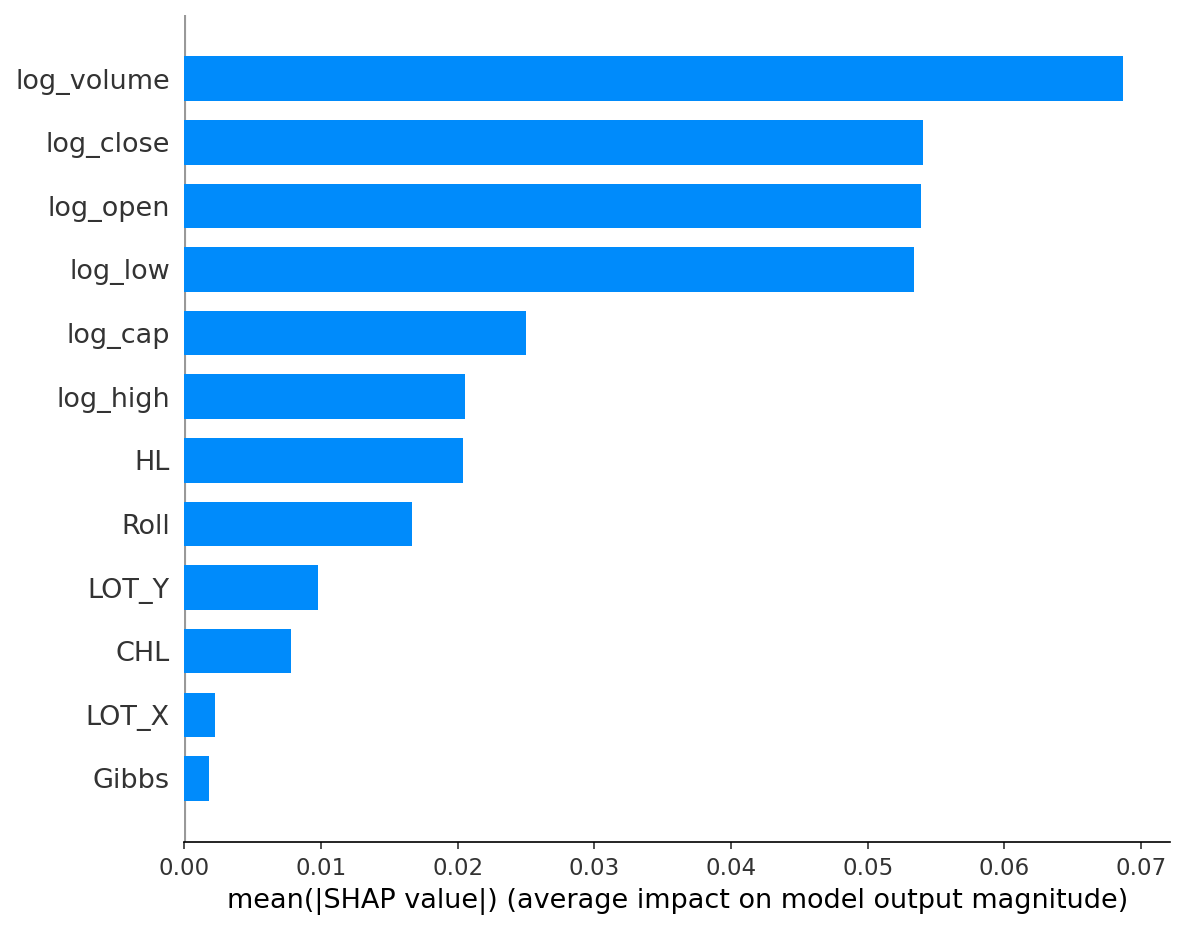

In [20]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(shap_v, fea_v, feature_names=fea_names, plot_type='bar')


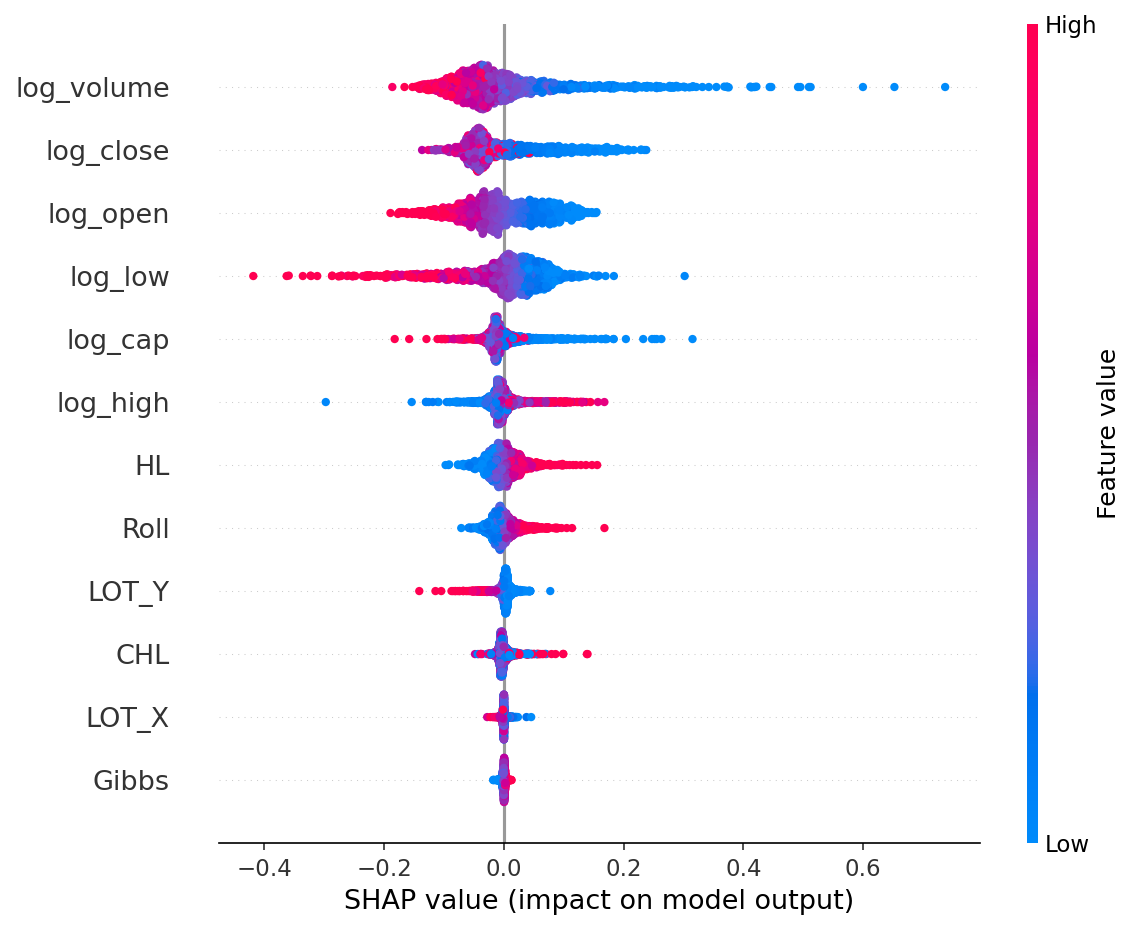

In [18]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(shap_v, fea_v, feature_names=fea_names)

### 价差的SHAP

In [24]:
se = SpreadEstimator()
univ = se.data.data_dic['volume'] > 0  # 合法的univ
with open(r'D:\Documents\学习资料\本科毕业论文/data/signal_spread.pkl', 'rb') as f:
    signal = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data/target_spread.pkl', 'rb') as f:
    target = pickle.load(f)
with open(r'D:\Documents\学习资料\本科毕业论文/data//close_top.pkl', 'rb') as f:
    close_top = pickle.load(f)
univ = univ & close_top

for i in range(signal.shape[0]):
    for j in range(signal.shape[2]):
        signal[i, univ[i], j] -= np.nanmean(signal[i, univ[i], j])
        signal[i, univ[i], j] /= np.nanstd(signal[i, univ[i], j])
x, y = get_train_data_cs(signal, target * 100, univ & close_top, s=120, e=220)

x = torch.cat(x, dim=0)
y = torch.cat(y, dim=0)
print(x.shape)

Mean of empty slice
Degrees of freedom <= 0 for slice.
invalid value encountered in true_divide
100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2691.50it/s]

torch.Size([154598, 12])


In [27]:
res_spread = sv(GateNet_spread_cs, x[::100], M=10000)

100%|██████████████████████████████████████████████████████████████████████████████| 1546/1546 [01:33<00:00, 16.58it/s]


In [28]:
shap_v = np.vstack([np.array([j[1] for j in res_spread [i]]) for i in range(12)]).T
fea_v = np.vstack([np.array([j[0] for j in res_spread [i]]) for i in range(12)]).T
shap_v.shape

(1546, 12)

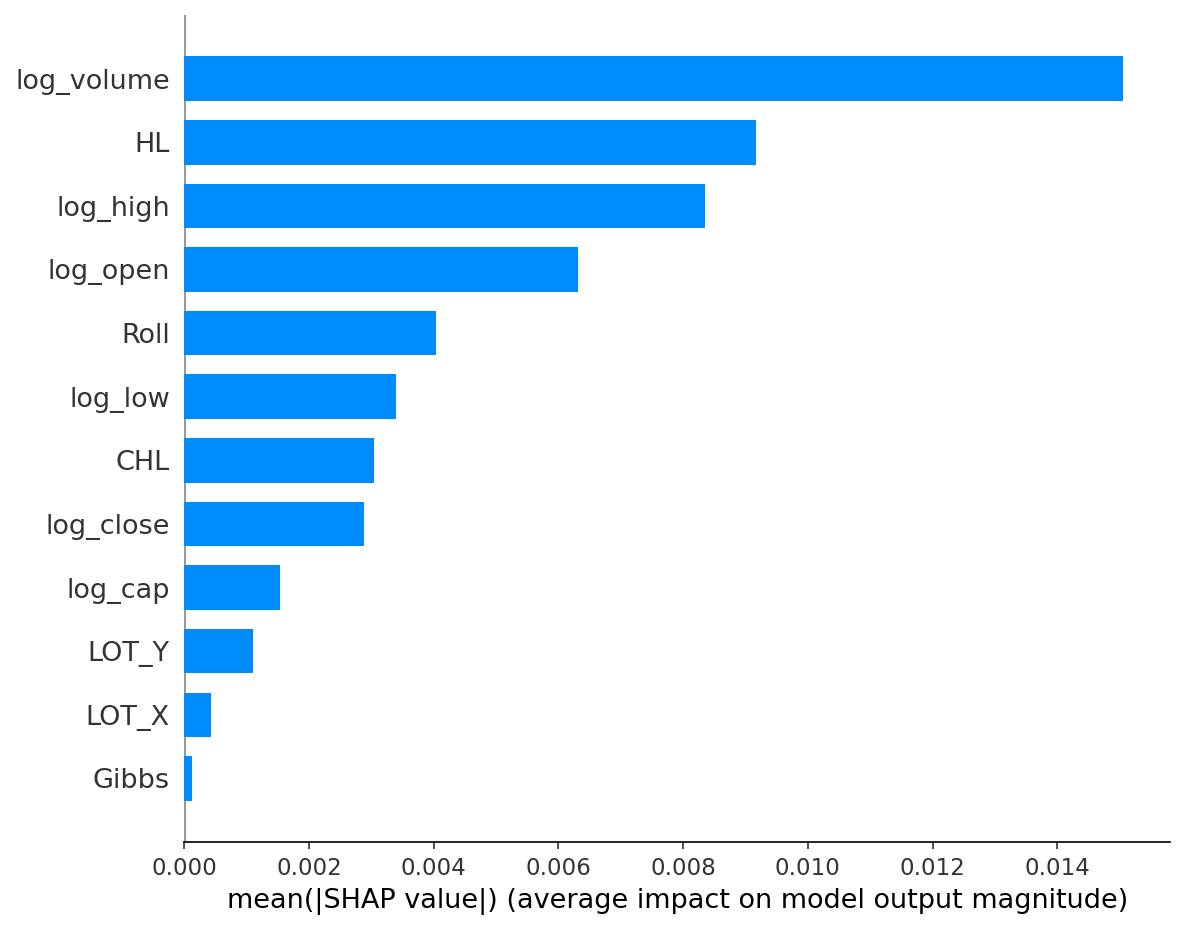

In [29]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(shap_v, fea_v, feature_names=fea_names, plot_type='bar')


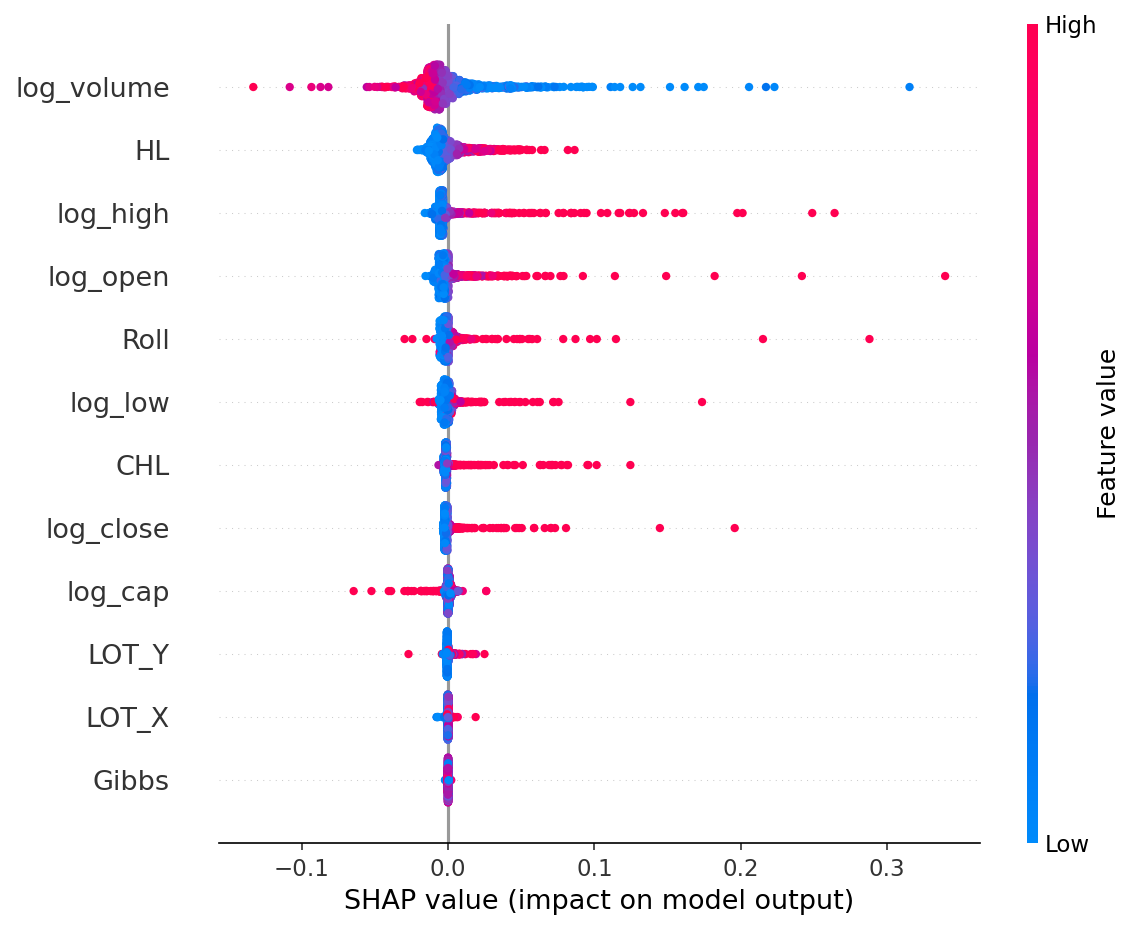

In [30]:
plt.figure(dpi=150)
fea_names = np.array([ 'Roll', 'HL', 'LOT_X', 'LOT_Y', 'Gibbs', 'CHL',
                      'log_open', 'log_close', 'log_high', 'log_low', 'log_volume', 'log_cap'])
shap.summary_plot(shap_v, fea_v, feature_names=fea_names)